# Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
%config InlineBackend.figure_format = 'svg'

In [2]:
e0 = 611
T0 = 273.15
mv = 18/1000
md = 29/1000
L = 2.45*10**6
R = 8.314

## Part A

While the relative humidity of the parcel is less than 100%, the parcel follows a dry adiabat and the specific humidity $q$ is conserved. Since

$$q = \frac{m_v}{m_d}\frac{e}{p}=\frac{m_v}{m_d}\frac{RHe_s(T)}{p} $$

It follows that

$$\left(\frac{RH e_s(T)}{p} \right)_1 =\left(\frac{RH e_s(T)}{p} \right)_2 $$

and thus

$$RH_2 = RH_1 \frac{e_s(T_1)}{e_s(T_2)}\frac{p_2}{p_1}$$

where $T_2$ is given by the fact that the parcel follows an adiabat in the atmosphere:

$$T_2 = T_1\left(\frac{p_2}{p_1}\right)^{2/7} $$

In [3]:
RH1 = 50
p1 = 980*100; p2 = 850*100
T1 = 273.15+25

def es(T):
    return e0 * np.exp(mv*L/R * (1/273.15 - 1/T))

Find $T_2$:

In [4]:
T2 = T1*(p2/p1)**(2/7)
display(Math(r"T_2={%.2f}^\circ C" % (T2-273.15)))

<IPython.core.display.Math object>

Find $RH_2$:

In [5]:
RH2 = RH1*(es(T1)/es(T2))*(p2/p1)
display(Math(r"RH_2={%.2f}" % RH2 + "\%"))

<IPython.core.display.Math object>

## Part B

For this we will need to plot relative humidity as a function of pressure and determine the location where the relative humidity becomes 100%.

In [6]:
def adiabat_temp(p0, p1, T0):
    return T0*(p1/p0)**(2/7)

def RH(RH0, p0, T0, p):
    T = adiabat_temp(p0, p, T0)
    return RH0*(es(T0)/es(T))*(p/p0)

Define the initial conditions and final pressure that we consider, then get arrays of pressure and relative humidity:

In [7]:
p0 = 980*100; pf = 750*100
RH0 = 50
T0 = 273.15+25

pp = np.linspace(p0, pf, 1000)
RRHH = RH(RH0, p0, T0, pp)

Get the pressure where the relative humidity is 100%:

In [8]:
i = np.argmin(abs(RRHH-100))
p_lcl = pp[i]
display(Math(r"p_{lcl}={%.1f}hPa" % (p_lcl/100) ))

<IPython.core.display.Math object>

Plot Relative Humidity as a Function of Pressure to show this result graphically:

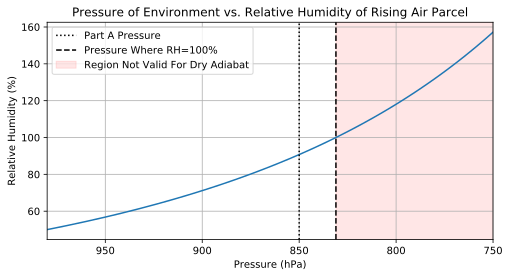

In [9]:
fig, ax = plt.subplots(figsize = (8,4))

ax.plot(pp/100, RRHH)
ax.set_ylabel('Relative Humidity (%)')
ax.set_xlabel('Pressure (hPa)')
ax.set_xlim(p0/100, pf/100)
ax.set_title('Pressure of Environment vs. Relative Humidity of Rising Air Parcel')

ax.axvline(p2/100, color='k', linestyle=':', label='Part A Pressure')
ax.axvline(p_lcl/100, color='k', linestyle='--', label='Pressure Where RH=100%')
ax.axvspan(p_lcl/100, pf/100, alpha=0.1, color='red', label='Region Not Valid For Dry Adiabat') ##std


ax.legend()

ax.grid()

## Part C

Up untill the point where $RH=100\%$, we can use the fact that the parcel travels along a dry adiabat.

In [10]:
T_lcl = T0*(p_lcl/p0)**(2/7)
display(Math(r"T_{lcl}={%.2f}^\circ C" % (T_lcl-273.15)))

<IPython.core.display.Math object>

## Part D

Now specific humidity is no longer conserved, but we are given the pressure and temperature so we can compute $q$ using (3.6.29)

In [11]:
T_part_d = 273.15 + 3.7
p_part_d = 700 * 100

q = (mv/md)*(es(T_part_d)/p_part_d)
display(Math(r"q={%.5f}" % (q)))

<IPython.core.display.Math object>

## Part E

As the parcel descends, it gains no water mass since there is no nete evaporation and it loses no water mass since all the water has already fallen out. Thus the parcel follows a dry adiabat and we can compute the temperature as we would for adiabatic motion.

In [12]:
T0 = 273.15 + 3.7
p0 = 700; pf = 980

Tf = T0*(pf/p0)**(2/7)
display(Math(r"T_f={%.2f}^\circ C" % (Tf-273.15)))

<IPython.core.display.Math object>

The relative humdity can be determined the same way we determined in back in part a) assuming an initial relative humidity of 100% since the parcel will follow a dry adiabat.

In [13]:
RHf = 100*(es(T0)/es(Tf))*(pf/p0)
display(Math(r"RH_f={%.2f}" % RHf + "\%"))

<IPython.core.display.Math object>

It is clear that the parcel is warmer and drier than when it started. It is:

**(i)** **Drier** because water condensed and fell out of the air parcel when it followed a moist adiabat (in part d) from $831$hPa to $700$hPa.

**(ii)** **Warmer** because when the water condensed and fell out of air parcel during its moist adibatic ascent, it released latent heat.